In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

Relevant states are $5s^1S_0, 5p^1P_1, 6s^3S_1, 5p^3P_{0,1,2}, 6p^3P_{0,1,2}, 4d^3D_{1,2,3}, 5d^3D_{1,2,3}$. Five transitions in total.

# Table 3.1

Final state: $\mid S, L_k, J_k \rangle$ with linewidth $\frac{1}{A_T}$

Initial state: $\mid S, L_i, J_i \rangle$

Transition rate connecting these two states is $\frac{1}{\tilde{A_{ik}}}$

<img src="files/branching_ratio.png", width=450>

where $p$ is the polarization of the photon.

$p = 0$, linear

$p = \pm 1$, circular

In [7]:
from sympy import S
from sympy.physics.wigner import racah
from sympy.physics.wigner import wigner_3j

In [11]:
def A_ik(S, L_i, J_i, L_k, J_k, p, m_i):
    tem1 = (2 * J_i + 1) * (racah(J_i, J_k, L_i, L_k, 1 ,S))**2
    tem2 = 0
    tem3 = 0
    for m_k in range(-1 * J_k, J_k + 1, 1):
        tem3 = tem3 + (2 * J_k + 1) * (wigner_3j(J_i, 1, J_k, m_i, p, -1 * m_k))**2
    for J in range(abs(L_i - S), abs(L_i + S) + 1, 1):
        tem2 = tem2 + (2 * J + 1) * (racah(J, J_k, L_i, L_k, 1 ,S))**2
    return tem1 * tem3 / tem2

In [6]:
print racah(3,3,3,3,3,3)
print wigner_3j(2, 6, 4, 0, 0, 0)

-1/14
sqrt(715)/143


In [42]:
# 1P1 -> 1S0
print A_ik(0, 0, 0, 1, 1, -1, 0)
# 3S1 -> 3P0
print A_ik(1, 1, 0, 0, 1, 0, 0)
# 3S1 -> 3P1
print A_ik(1, 1, 1, 0, 1, -1, 1)
# 3P2 -> 3P1
print A_ik(1, 1, 1, 1, 2, -1, -1)

1
1/9
1/6
1/4


# Several constants

In [160]:
from __future__ import division, print_function, unicode_literals

# Basic constants
pi = 3.1415926
c = 299792458
h = 6.62606957e-34
hbar = h / 2 / pi
k_B = 1.3806488e-23
m_e = 9.10938291e-31
m_p = 1.672621898e-27
mu_0 = 4e-7 * pi
epsilon_0 = 1 / c**2 / mu_0
E = 1.602176565e-19
N_A = 6.02214129e+23
a_0 = 5.2917721067E-11


# Mass of Sr-88, Sr-87, Sr-86, Sr-84
M88 = 1.459706905272492E-25  
M87 = 1.4431557366419E-25  
M86 = 1.42655671117996E-25
M84 = 1.3934150821E-25
M = M88

# Polarizability of $^1S_0$ state

It couples only to the $^1P_1$ state with $\frac{\tilde{A_{ik}}}{A_T} = 1$ and $\zeta(\omega_{ik}) = 1$. Therefore $A_{ik} = \zeta(\omega_{ik}) \frac{\tilde{A_{ik}}}{A_T} A_T = A_T$. From Boyd Table 3.2, we have the relevant transition frequencies and rates as

In [76]:
# Transition frequency in units of 10^15 Hz
# omega = 2 * pi * f
omega_5s5p_1P1 = 4.09
omega_5s6p_1P1 = 6.43
omega_5s7p_1P1 = 7.33
omega_4d5p_1P1 = 7.76
omega_5s8p_1P1 = 7.76
omega_5s9p_1P1 = 8.00
omega_5s10p_1P1 = 8.16
omega_5s11p_1P1 = 8.28

# Transition rates in units of s^-1
AT_5s5p_1P1 = 190.5E6
AT_5s6p_1P1 = 1.86E6
AT_5s7p_1P1 = 3.19E6
AT_4d5p_1P1 = 1.2E7
AT_5s8p_1P1 = 1.49E7
AT_5s9p_1P1 = 1.16E7
AT_5s10p_1P1 = 7.6E6
AT_5s11p_1P1 = 4.88E6

omega_1P1 = [omega_5s5p_1P1, omega_5s6p_1P1, omega_5s7p_1P1, omega_4d5p_1P1, omega_5s8p_1P1, omega_5s9p_1P1, omega_5s10p_1P1, omega_5s11p_1P1]
AT_1P1 = [AT_5s5p_1P1, AT_5s6p_1P1, AT_5s7p_1P1, AT_4d5p_1P1, AT_5s8p_1P1, AT_5s9p_1P1, AT_5s10p_1P1, AT_5s11p_1P1]
A_1P1 = AT_1P1

In [149]:
# Omega in units of 2 * pi * 10^15 Hz
# Wavelength in units of nm
def Wavelength(omega):
    return 2 * pi * c * 1E-6 / omega

def Omega(wavelength):
    return 2 * pi * c * 1E-6 / wavelength

In [197]:
print (Wavelength(omega_5s5p_1P1))
print (Omega(Wavelength(omega_5s5p_1P1)) / (2 * pi))

460.550497598
0.65094372835


In [172]:
# 1S0 state polarizability calculation

def Alpha_1S0(omega):
    result = 0
    for i, omega_ik in enumerate(omega_1P1):
        result = result + A_1P1[i] * 1E-60 / ((omega_ik)**2 * ((omega_ik)**2 - (omega)**2))
    # result = result * 6 * pi * epsilon_0 * c**3   # SI units
    result = result * 3 / 2 * (c / a_0)**3    # Atomic units
    return result

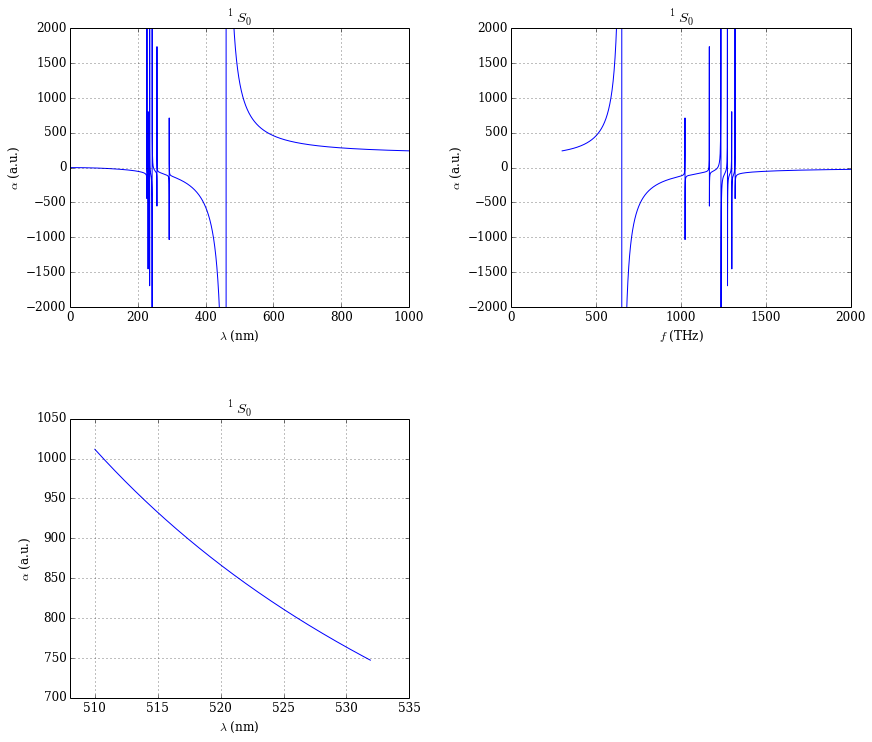

In [206]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange

figure = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

alpha = []
wavelength = arange(1, 1000, 0.1)
for _wavelength in wavelength:
    alpha.append(Alpha_1S0(Omega(_wavelength)))
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, alpha, markersize = 10)
ax1.set_ylim([-2000,2000])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title('$^1S_0$')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha, markersize = 10)
ax2.set_xlim([0,2000])
ax2.set_ylim([-2000,2000])
ax2.set_xlabel("$f$ (THz)")
ax2.set_ylabel(r"$\alpha$ (a.u.)")
ax2.legend(loc = 1)
ax2.set_title('$^1S_0$')
ax2.grid(1)

alpha = []
wavelength = arange(510, 532, 0.1)
for _wavelength in wavelength:
    alpha.append(Alpha_1S0(Omega(_wavelength)))

ax3 = plt.subplot(gs[1,0]) 
ax3.plot(wavelength, alpha, markersize = 10)
ax3.set_xlim([508,535])
ax3.set_xlabel("$\lambda$ (nm)")
ax3.set_ylabel(r"$\alpha$ (a.u.)")
ax3.legend(loc = 1)
ax3.set_title('$^1S_0$')
ax3.grid(1)

In [88]:
print (2**3)

8
